<a href="https://colab.research.google.com/github/kamyarkian/behavioral-data-sandbox/blob/main/Crypto_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Environment Setup
# We use yfinance to fetch real-world market data without API keys.
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Applying a professional dark theme for visualizations
plt.style.use('dark_background')
sns.set(style="darkgrid", rc={"axes.facecolor": "#1e1e1e", "grid.color": "#444444"})

print("✅ Environment Ready: Libraries loaded.")

✅ Environment Ready: Libraries loaded.


In [2]:
# 2. Data Acquisition
# Fetching Bitcoin (BTC-USD) data to analyze volatility and market sentiment.
ticker = 'BTC-USD'
start_date = "2020-01-01"
end_date = "2025-11-25" # Today's date

print(f"🔄 Fetching data for {ticker}...")
df = yf.download(ticker, start=start_date, end=end_date)

# Display data structure to verify integrity
print(f"Data shape: {df.shape}")
df.head()

🔄 Fetching data for BTC-USD...


/tmp/ipython-input-1861204750.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data shape: (2155, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


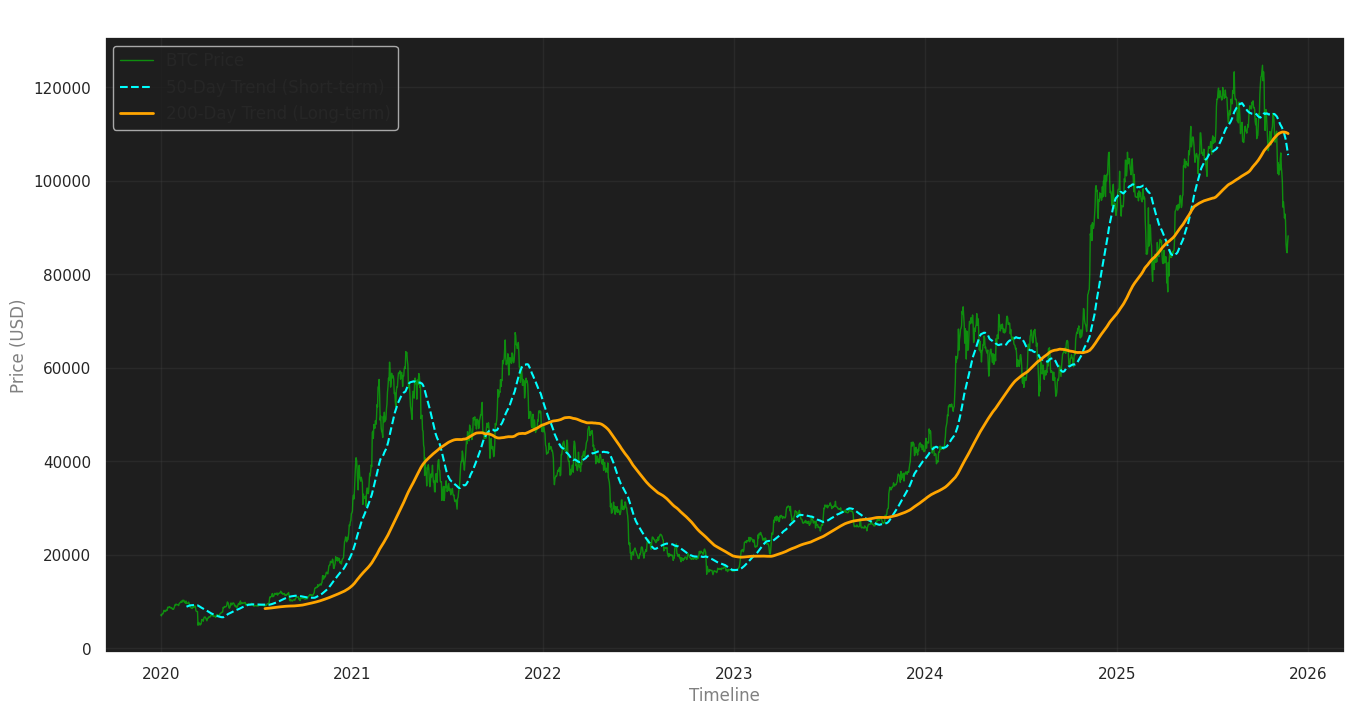

In [3]:
# 3. Behavioral Trend Analysis
# Calculating Moving Averages to identify 'Greed' (Uptrend) vs 'Fear' (Downtrend) phases.

# SMA 50: Short-term sentiment (Rapid reaction)
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# SMA 200: Long-term sentiment (Stable baseline)
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Visualization
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='BTC Price', color='#00ff00', alpha=0.5, linewidth=1)
plt.plot(df['SMA_50'], label='50-Day Trend (Short-term)', color='cyan', linestyle='--', linewidth=1.5)
plt.plot(df['SMA_200'], label='200-Day Trend (Long-term)', color='orange', linestyle='-', linewidth=2)

plt.title(f'Bitcoin Market Psychology: Price vs. Strategic Trends ({start_date} to Present)', fontsize=18, color='white')
plt.xlabel('Timeline', fontsize=12, color='gray')
plt.ylabel('Price (USD)', fontsize=12, color='gray')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()